In [ ]:
import pandas as pd

In [ ]:
# corona.csv 파일 로드
# 상위 폴더 이동(../) -> csv 폴더로 이동 (csv/) -> corona.csv

corona = pd.read_csv("../csv/corona.csv")

### 기초 함수들: head, drop.copy

In [ ]:
# 상위 3개만 출력
# head(n): 상위 n개만큼 출력
corona.head(3)

In [ ]:
# 특정한 컬럼의 삭제
# drop({조건}, axis=?, inplace = bool)
# (1) 조건 -> 컬럼의 기준 : 컬럼의 이름 / 인덱스 기준: 인덱스의 이름|인덱스의 조건식 
# (2) axis 매개변수: 행, 열의 기준을 지정 (0 | row, 1 | columns) - 0 혹은 row, 1 혹은 column
# (3) inplace 매개변수 : 기준이 되는 데이터프레임을 변경할 것인가 지정 (기본값은 false)

corona.drop(['Unnamed: 0'], axis= 1)   

# 다시 corona를 쳐보면 Unnamed가 그대로 나옴. 실제 corona는 변경되지 않고, '이렇게 될 거다'라는 시뮬레이션만 나옴 
# 실제로 바꾸려면 새로운 데이터를 지정해주거나 inplace를 true

corona2 = corona.drop('Unnamed: 0', axis = 1)
corona.drop(['Unnamed: 0'], axis = 1, inplace=True)


In [ ]:
# 특정한 인덱스 제거
corona.drop([0],axis = "rows")

In [ ]:
# 원본 데이터를 유지 복사본 데이터로 수정
# df = corona
# df.drop([0],axis=0,inplace=True)  # df = corona기 때문에 df에 가해진 수정은 corona에도 가해짐. 

df = corona.copy()
df.drop([1],axis=0,inplace=True)

# df = df.drop([1], axis=0, inplace=True) : df에다가 우측을 대입하는데, 우측에 사실 input이 없기 때문에 df는 빈 칸으로 나오게 됨

In [ ]:
corona = pd.read_csv("../csv/corona.csv")
df = corona.copy()
df.drop(['Unnamed: 0'], axis= 1,inplace=True)
df.head(1)   

### 인덱스: 수정, sort, 초기화

In [ ]:
df.columns
df.columns = ['등록일시','총사망자','총확진자','게시글번호','기준일','기준시간','수정일시','누적의심자','누적확진자']

In [ ]:
df.head(1)

In [ ]:
# 데이터프레임에서 특정 컬럼을 기준으로 정렬을 변경
# sort_values([{기준이 되는 컬럼}], ascending = bool, inplace = bool)
# (1) ascending 매개변수: 오름차순, 내림차순 (False) 지정 (기본값은 True)
# (2) inplace 매개변수 : 기준이 되는 데이터프레임을 변경할 것인가 지정 (기본값은 false)

df.sort_values(['등록일시'], inplace = True)        # 등록일시를 기준으로 오름차순 정렬

In [ ]:
df.head()

# 인덱스가 819부터 시작하는 거 매우 불편함. index를 재설정하기 위해서는 
# reset_index(drop = bool, inplace = bool)
# (1) drop 매개변수: 기존의 인덱스를 삭제할 것인가 지정 (기본 = False)
 # df.reset_index()  기존 index를 보존함 
df.reset_index(drop = True)

In [ ]:
# 다른 방법
df = df.reset_index().drop(['index'],axis =1)

### 결측치: isna, fillna

In [ ]:
# 결측치의 존재를 확인

# case1. 데이터프레임의 정보를 출력 
# info()
df.info()

# case2. 결측치의 개수를 확인
# is함수: 특정한 값이 존재하는가? -> bool의 형태로 출력 
# 결측치가 존재하는가? -> isna()

df.isna()

# sum(): 열을 기준으로 합계를 내줌. -> axis 매개변수를 변경하면 행을 기준으로 합계를 구할 수 있음 
df.isna().sum(axis=1)

df.isna().sum()

# 대개 3-5% 이하의 결측치는 삭제해도 큰 영향을 주지 않음. 


In [ ]:
# 결측치 특정한 값으로 대체
# fillna({특정한 데이터값})
# fillna(method=?)
    # method 매개변수
        #   'ffill' : 전 데이터의 값으로 대체 
        #   'bfill' : 후 데이터의 값으로 대체

df['누적의심자'].fillna(method='ffill')

In [ ]:
# 누적의심자 컬럼의 결측치를 누적의심자의 평균 값으로 대체 (mean,median,max,min도 가능)
df['누적의심자'].fillna(df['누적의심자'].max())  

df['누적의심자'] = df['누적의심자'].fillna(method='ffill')
df.isna().sum()                                             # 수정 확인 


### Rename. 

In [ ]:
# 특정 컬럼의 이름을 변경
df.head(3)      # 딱 봐도 누적확진자 데이터가 이상함 (고의적으로 rename시킨 것)

# rename(index = {'before' : 'after'}, columns = {'before': 'after'}, inplace)
df.rename(columns={'누적확진자':'누적확진율'},inplace = True)


In [ ]:
df.head(3)

### Shift. Diff

In [ ]:
# shift(n)
# 컬럼을 n만큼 이동해서 새로운 series를 생성 (n은 1이 기본값. 1씩 밑으로 내려감. -값 허용)
df['총확진자'].shift(1)

# 일일확진자 수 = 오늘의 총확진자 - 어제의 총확진자 
df['일일확진자'] = (df['총확진자'] - df['총확진자'].shift()).fillna(0)  # 결측치를 fillna(0)으로 제거 
df.head(5)

# diff(n): 해당하는 컬럼에서 n만큼 이동한 데이터와의 차이를 출력 
df['일일사망자'] = (df['총사망자'].diff(1)).fillna(0)
df['일일사망자2'] =  (df['총사망자'] - df['총사망자'].shift()).fillna(0) 
df.drop(['일일사망자2'], axis = 1, inplace= True)
df.head(5)

### 필터링: loc, iloc
- loc[인덱스의 조건, 컬럼의 조건]: location 
    - 특정한 인덱스의 조건에 일치하는 데이터를 확인 
    - 특정한 컬럼의 조건에 일치하는 데이터를 확인 
- iloc[인덱스의 위치, 컬럼의 위치]
    - 특정한 인덱스의 위치의 데이터를 확인
    - 특정한 컬럼의 위치의 데이터를 확인

In [126]:
df2 = df.copy()
df2.drop([0,1],axis=0,inplace=True)
df2.head(3)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [ ]:
# 특정한 인덱스의 조건 필터 (인덱스 숫자가 3부터 5까지)
df2.loc[3:5]

In [ ]:
# 특정한 인덱스의 위치 필터 (인덱스의 위치가 '4번째'부터 '6번째' 전)
df2.iloc[3:5]

In [ ]:
# 특정한 칼럼의 조건 필터
df2.loc[:,['총확진자','일일확진자']]

In [125]:
# 특정한 컬럼의 위치필터
df2.iloc[:,1:5]

,총사망자,총확진자,게시글번호,기준일
2,66,7869,53,20200312
3,67,7979,54,20200313
4,72,8086,55,20200314
5,75,8162,56,20200315
6,75,8236,57,20200316
...,...,...,...,...
815,24238,18153814,900,20220604
816,24258,18163648,901,20220605
817,24279,18168670,902,20220606
818,24299,18174842,903,20220607


In [128]:
# 특정한 조건식
(df['일일확진자'] < 0).value_counts()
df.loc[df['일일확진자'] < 0]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [134]:
# 데이터의 이상을 확인하기 위해서 인덱스 444부터 448번부터 확인 (일일확진자/사망자 수치가 -인 건 누가 봐도 이상함.)
df.loc[444:448]

# 445번 인덱스의 입력날짜가 잘못되었기에 등록일시를 바꿔줄 거임. 

df.loc[445,'등록일시'] = "2021-05-31 00:00:00.000"
df.loc[445]


등록일시     2021-05-31 00:00:00.000
총사망자                        1959
총확진자                      140337
게시글번호                        498
기준일                     20210531
기준시간                       00:00
수정일시     2021-10-14 13:48:56.821
누적의심자                  9761156.0
누적확진율                   1.456805
일일확진자                      910.0
일일사망자                        8.0
Name: 445, dtype: object

In [141]:
# 등록일시를 기준으로 오름차순 정렬
df.sort_values(['등록일시'],inplace = True)


In [147]:
# 인덱스를 초기화하고 기존의 인덱스는 제거
df.reset_index(drop = True, inplace = True)

In [149]:
# 일일확진자 칼럼을 수정
df['일일확진자'] = (df['총확진자'] - df['총확진자'].shift(1)).fillna(0)

# 일일사망자 칼럼을 수정 
df['일일사망자'] = (df['총사망자'] - df['총사망자'].shift(1)).fillna(0)

In [150]:
df.loc[df['일일확진자'] < 0]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자


### Recasting: date/time, weekday, apply

In [162]:
# 등록일시 컬럼의 데이터 타입을 문자열에서 시계열 데이터로 타입 변경
# to_datetime({series 형태의 데이터}, format = {데이터의 형태})
    # %Y: 4자리의 년도수
    # %y: 2자리의 년도수
    # %m: 월
    # %d: 일
    # %H: 24시간 기준
    # %h: 12시간 기준 
    # %M: 분
    # %S: 초
# pandas 내장함수 
df['등록일시'] = pd.to_datetime(df['등록일시'])

In [163]:
df['기준일'] = pd.to_datetime(df['기준일'], format= '%Y%m%d')   # 그냥 ns 단위로 더해주는 것밖에 안 됨. 1970년은 컴퓨터 시계열의 가장 첫 날짜임 (Unix가 열려진 연도)
# 그런고로 format으로 지정을 해줘야함 

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   등록일시    820 non-null    datetime64[ns]
 1   총사망자    820 non-null    int64         
 2   총확진자    820 non-null    int64         
 3   게시글번호   820 non-null    int64         
 4   기준일     820 non-null    datetime64[ns]
 5   기준시간    820 non-null    object        
 6   수정일시    817 non-null    object        
 7   누적의심자   820 non-null    float64       
 8   누적확진율   623 non-null    float64       
 9   일일확진자   820 non-null    float64       
 10  일일사망자   820 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 70.6+ KB


In [168]:
# 시계열 데이터에서 요일의 값을 가진 변수: weekday  
# 0은 월, 1은 화...
df['요일'] = df['등록일시'].dt.weekday

In [169]:
df.head(10)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자,요일
0,2020-03-10,54,7513,51,2020-03-10,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,1
1,2020-03-11,60,7755,52,2020-03-11,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,2
2,2020-03-12,66,7869,53,2020-03-12,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,3
3,2020-03-13,67,7979,54,2020-03-13,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,4
4,2020-03-14,72,8086,55,2020-03-14,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,5
5,2020-03-15,75,8162,56,2020-03-15,00:00,2021-10-07 10:30:51.51,268212.0,3.239660,76.0,3.0,6
6,2020-03-16,75,8236,57,2020-03-16,00:00,2021-10-07 10:30:51.51,274504.0,3.173392,74.0,0.0,0
7,2020-03-17,81,8320,58,2020-03-17,00:00,2021-10-07 10:30:51.51,286716.0,3.088058,84.0,6.0,1
8,2020-03-18,84,8413,59,2020-03-18,00:00,2021-10-07 10:30:51.51,295647.0,3.012163,93.0,3.0,2
9,2020-03-19,91,8565,60,2020-03-19,00:00,2021-10-07 10:30:51.51,307024.0,2.942086,152.0,7.0,3


In [171]:
# 요일을 우리가 아는 '요일'로 수정: 자료형 데이터를 함수에 각각 대입하여 결과값을 자료형으로 받는 'map' 함수를 이용하자
# apply(): Series 형태의 데이터를 일반함수에 대입하여 새로운 시리즈 형태의 데이터를 생성

# Series Class 안에 있는 함수
def change(x):
    if x == 0: 
        result = '월'
    elif x == 1: 
        result = '화'
    elif x == 2: 
        result = '수'
    elif x == 3:
        result = '목'
    elif x == 4: 
        result = '금'
    elif x == 5:
        result = '토'
    else:
        result = '일'
    return result 



In [180]:
def change2(x): 
    # x: 0, 1, 2, 3, 4, 5, 6
    # 자료형 데이터로 x 값의 위치에 있는 데이터를 출력해 본다 
    _list = ['월','화','수','목','금','토','일']
    result = _list[x]
    return result

In [181]:
change2(3)

'목'

In [183]:
df['요일'] = df['요일'].apply(change2)       # 시리즈 안에 key:value가 있기에 apply 함수가 알아서 함 

In [177]:
# ex. apply의 개념 
class Test:
    def __init__(self, _values, _index = 0):
        if _index == 0:
            self.index = list(range(len(_values)))
        else: 
            self.index = _index                 # self.변수명: 독립적인 변수다 
        self.values = _values
    def apply(self, _func):                  # 일반 함수의 명을 받아서 (역시 함수는 input으로 명령)
        result = list(map(_func, self.values)) # 그 결과물을 map한 list를 돌려준다 
        return result

In [178]:
test1 = Test([5, 4, 3, 2, 1])   #([5,4,3,2,1])가 _values > self.values로 쓰임 
test1.index

[0, 1, 2, 3, 4]

In [179]:
test1.apply(change)         

['토', '금', '목', '수', '화']

In [186]:
df

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자,요일
0,2020-03-10 00:00:00.000,54,7513,51,2020-03-10,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,화
1,2020-03-11 00:00:00.000,60,7755,52,2020-03-11,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,수
2,2020-03-12 00:00:00.000,66,7869,53,2020-03-12,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,목
3,2020-03-13 00:00:00.000,67,7979,54,2020-03-13,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,금
4,2020-03-14 00:00:00.000,72,8086,55,2020-03-14,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,토
...,...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,2022-06-04,00:00,2022-06-08 09:11:26.303,21518073.0,NaN,12039.0,9.0,토
816,2022-06-05 08:53:19.426,24258,18163648,901,2022-06-05,00:00,2022-06-08 09:11:04.758,21518073.0,NaN,9834.0,20.0,일
817,2022-06-06 09:00:06.734,24279,18168670,902,2022-06-06,00:00,2022-06-08 09:10:50.441,21518073.0,NaN,5022.0,21.0,월
818,2022-06-07 09:09:00.897,24299,18174842,903,2022-06-07,00:00,2022-06-08 09:10:36.846,21518073.0,NaN,6172.0,20.0,화


### 그룹화 연산 : Groupby

In [206]:
# 데이터가 같은 값들끼리 데이터를 모아서 연산 (최소, 최대, 표준편차, 합계, 평균, 개수)
# 데이터 프레임명.groupby({특정한 칼럼}). 연산함수()

df[['요일','일일사망자','일일확진자']].groupby('요일').sum()   # index에 '요일'이라는 새로운 이름이 생김 
df[['요일','일일사망자','일일확진자']].groupby('요일').mean()
group_data = df[['요일','일일사망자','일일확진자']].groupby('요일').agg(['mean','sum']) # 멀티컬럼이 생기기 시작

In [209]:
# 멀티 컬럼에서 특정한 시리즈를 출력하려면? : 가장 상위 단계부터 컬럼을 하나씩 제거해 나감
group_data['일일사망자']['mean']

요일
금    32.897436
목    34.206897
수    28.152542
월    24.076923
일    28.504274
토    32.504274
화    26.754237
Name: mean, dtype: float64

### 데이터 시각화: bar

In [211]:
import matplotlib.pyplot as plt

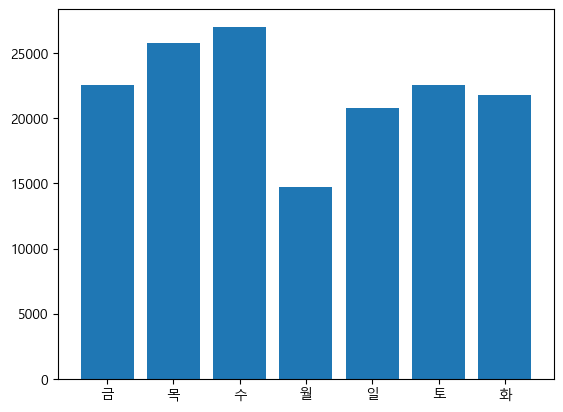

In [220]:
# 일일확진자의 평균값을 바형 그래프
x = group_data.index
y = group_data['일일확진자']['mean']

plt.bar(x,y)
plt.show()

In [214]:
import platform

In [216]:
# matplotlib의 폰트 설정을 변경. (한글이 지원되는 폰트)
# OS가 MAC이라면
if platform.system() == 'Darwin':
    plt.rc('font',family = "AppleGothic")
else:
    plt.rc('font',family = 'Malgun Gothic')

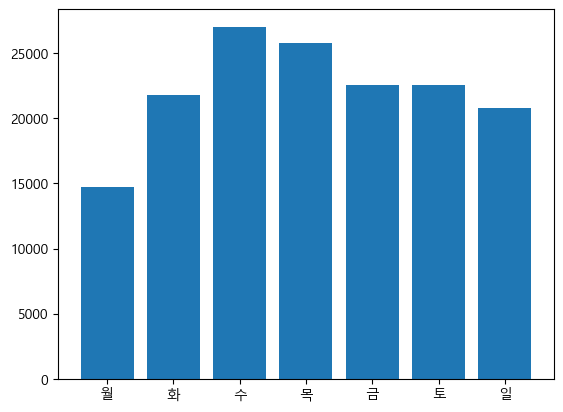

In [223]:
week_order = ['월','화','수','목','금','토','일']
group_data = group_data.loc[week_order]

x = group_data.index
y = group_data['일일확진자']['mean']

plt.bar(x,y)
plt.show()

In [224]:
group_data

일일사망자                 일일확진자           
         mean     sum          mean        sum
요일                                            
월   24.076923  2817.0  14739.230769  1724490.0
화   26.754237  3157.0  21783.652542  2570471.0
수   28.152542  3322.0  26994.550847  3185357.0
목   34.206897  3968.0  25776.267241  2990047.0
금   32.897436  3849.0  22542.854701  2637514.0
토   32.504274  3803.0  22555.948718  2639046.0
일   28.504274  3335.0  20801.384615  2433762.0

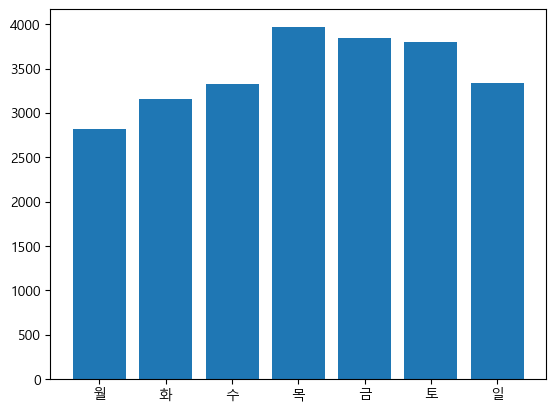

In [228]:
x = group_data.index
y = group_data['일일사망자']['sum']
plt.bar(x,y)
plt.show()

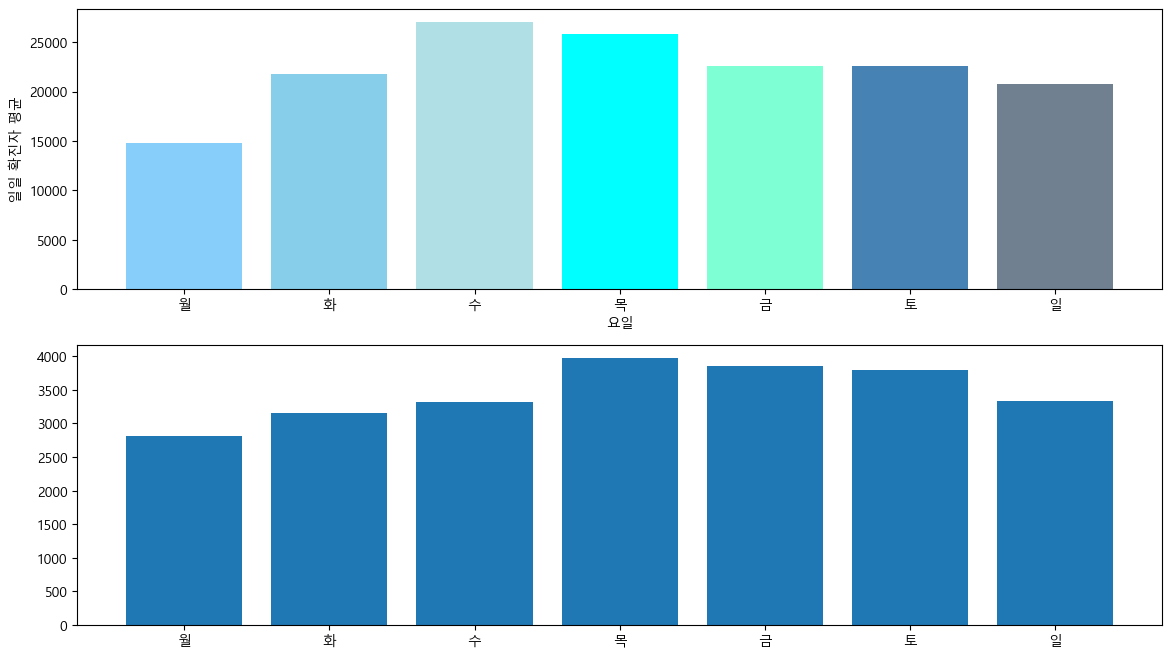

In [242]:
# 두 그래프를 분할해서 한 화면에서 표기
# subplot({행의 수},{열의 수},{위치})

x = group_data.index
y1 = group_data['일일확진자']['mean']
y2 = group_data['일일사망자']['sum']
color_list = ['lightskyblue','skyblue','powderblue','aqua','aquamarine','steelblue','slategray']

 
plt.figure(figsize=(14,8))  # 출력되는 화면의 사이즈 변경
plt.subplot(2,1,1)  # 화면을 2분할 해서 첫번째 위치를 지정
plt.bar(x,y1,color = color_list) # 바형 그래프 생성 막대의 색을 변경

plt.xlabel("요일")              # 축 이름:
plt.ylabel("일일 확진자 평균")

# 두 번째 위치로 변경
plt.subplot(2,1,2)
plt.bar(x,y2)

plt.show()

In [243]:
df

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자,요일
0,2020-03-10 00:00:00.000,54,7513,51,2020-03-10,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,화
1,2020-03-11 00:00:00.000,60,7755,52,2020-03-11,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,수
2,2020-03-12 00:00:00.000,66,7869,53,2020-03-12,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,목
3,2020-03-13 00:00:00.000,67,7979,54,2020-03-13,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,금
4,2020-03-14 00:00:00.000,72,8086,55,2020-03-14,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,토
...,...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,2022-06-04,00:00,2022-06-08 09:11:26.303,21518073.0,NaN,12039.0,9.0,토
816,2022-06-05 08:53:19.426,24258,18163648,901,2022-06-05,00:00,2022-06-08 09:11:04.758,21518073.0,NaN,9834.0,20.0,일
817,2022-06-06 09:00:06.734,24279,18168670,902,2022-06-06,00:00,2022-06-08 09:10:50.441,21518073.0,NaN,5022.0,21.0,월
818,2022-06-07 09:09:00.897,24299,18174842,903,2022-06-07,00:00,2022-06-08 09:10:36.846,21518073.0,NaN,6172.0,20.0,화


Export

In [254]:
# Dataframe을 csv 파일로 저장
# to_csv({저장할 파일의 경로와 이름},encoding = {인코딩 엔진})
# 한글은 기존 인코딩이 아닌 CP949를 이용해야 함. 안 그러면 한글 인식 못해서 깨지는 오류.
# 인덱스는 제외하고 파일을 저장  (저장할 때 index가 변수로 들어가게 되는데 그걸 방지)
df.to_csv("corona.csv",encoding ='CP949',index=False)         

In [255]:
pd.read_csv("./corona.csv", encoding='CP949')

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일확진자,일일사망자,요일
0,2020-03-10 00:00:00.000,54,7513,51,2020-03-10,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,화
1,2020-03-11 00:00:00.000,60,7755,52,2020-03-11,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,수
2,2020-03-12 00:00:00.000,66,7869,53,2020-03-12,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,목
3,2020-03-13 00:00:00.000,67,7979,54,2020-03-13,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,금
4,2020-03-14 00:00:00.000,72,8086,55,2020-03-14,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,토
...,...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,2022-06-04,00:00,2022-06-08 09:11:26.303,21518073.0,NaN,12039.0,9.0,토
816,2022-06-05 08:53:19.426,24258,18163648,901,2022-06-05,00:00,2022-06-08 09:11:04.758,21518073.0,NaN,9834.0,20.0,일
817,2022-06-06 09:00:06.734,24279,18168670,902,2022-06-06,00:00,2022-06-08 09:10:50.441,21518073.0,NaN,5022.0,21.0,월
818,2022-06-07 09:09:00.897,24299,18174842,903,2022-06-07,00:00,2022-06-08 09:10:36.846,21518073.0,NaN,6172.0,20.0,화


In [256]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------------------- 250.0/250.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
df.to_excel("corona.xlsx",index= False)